In [103]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import pandas as pd

# Specify the encoding while reading the CSV file
df = pd.read_csv("spam.csv", encoding='latin1')

# Display the first 5 rows
df.head(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [13]:
df["Unnamed: 2"].value_counts().nunique()

3

In [17]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.shape

(5572, 2)

In [22]:
df['v2'] = df['v2'].str.lower()

In [24]:
df['v2_tokens'] = df['v2'].apply(word_tokenize)

In [28]:
df["v2"][0]

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

In [29]:
stop_words = set(stopwords.words('english'))

df['v2_tokens'] = df['v2_tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [31]:
df.drop(columns="v2",inplace=True)
df.head(5)

,v1,v2_tokens
0,ham,"[go, jurong, point, ,, crazy, .., available, b..."
1,ham,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, ..., u, c, already, ..."
4,ham,"[nah, n't, think, goes, usf, ,, lives, around,..."


In [50]:
from sklearn.model_selection import train_test_split

# Assuming 'v2_tokens' and 'label' are your tokenized text and label columns
X = df['v2_tokens'].apply(lambda tokens: ' '.join(tokens))
y = df['v1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [51]:
print("X_train_vectorized shape:",X_train_vectorized.shape)
print("X_test_vectorized shape:",X_test_vectorized.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train_vectorized shape: (4457, 7671)
X_test_vectorized shape: (1115, 7671)
y_train shape: (4457,)
y_test shape: (1115,)


In [94]:
# Assuming you have already performed the necessary preprocessing and vectorization steps
# X_train_vectorized and X_test_vectorized should be available
# Initialize SVC
svc_classifier = SVC(C=1,
    kernel='linear',
    degree=3,gamma="auto" )

# Train the model
svc_classifier.fit(X_train_vectorized, y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [95]:
# Make predictions on the test set
svc_predictions = svc_classifier.predict(X_test_vectorized)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, svc_predictions))
print("Classification Report:\n", classification_report(y_test, svc_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_predictions))

Accuracy: 0.9802690582959641
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[965   0]
 [ 22 128]]


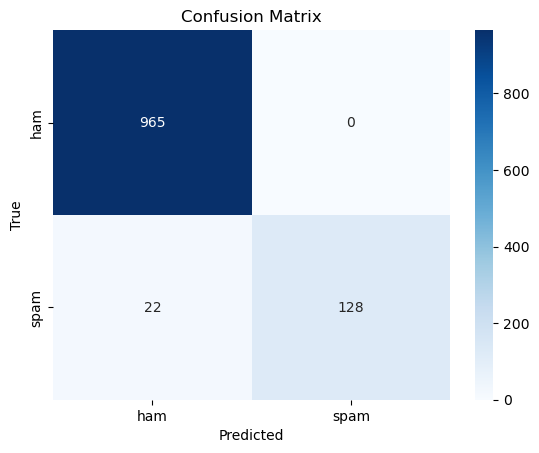

In [104]:
# Plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, svc_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Test model on new sample

In [109]:
# Example new email text
# Example new email text
new_email_text = '''In the spring of 1999, the digital world faced one of its first major security crises: the Melissa virus. This virus, disguised as an innocent email attachment, rapidly spread through email systems, causing unprecedented disruption.

The FBI reports that the collective damage caused by the Melissa virus was estimated at around $80 million​​. This staggering figure primarily stemmed from the extensive cleanup and repair efforts required to restore the affected computer systems.

What made Melissa particularly damaging was not just its widespread reach, but the speed at which it propagated. The virus would send itself to the first 50 contacts in the victim’s Microsoft Outlook address book, exponentially increasing its spread.

Businesses and government agencies were forced into a standstill as they grappled with the havoc wreaked by Melissa, marking it as a significant milestone in the history of cyber threats.'''

# Preprocess the new email
new_email_tokens = word_tokenize(new_email_text.lower())
new_email_tokens = [word for word in new_email_tokens if word not in stopwords.words('english')]

# Join the tokens into a string (as required by CountVectorizer)
new_email_tokens_string = ' '.join(new_email_tokens)

# Vectorize the new email using the same vectorizer
new_email_vectorized = vectorizer.transform([new_email_tokens_string])

# Make predictions using the trained SVM model
prediction = svc_classifier.predict(new_email_vectorized)

# Display the prediction
print("Prediction:", prediction[0])


Prediction: ham
